In this notebook, data reading, feature engineering, hyperparameter selection and model training are performed.

In [1]:
import pandas as pd
from xml.dom import minidom
from sklearn.model_selection import train_test_split

data is assigned to a variable and combined into a tuple called path_list.
xml format files.

In [2]:

path_es = 'ES_train.xml'
path_mx = 'MX_train.xml'
path_pe = 'PE_train.xml'
path_uy = 'UY_train.xml'

path_list  = (path_es, path_mx, path_pe, path_uy)


In [3]:
contenido = []
sentimiento = []
def contenido_atributos(path_list):

    '''Function to extract the comment and the 
        sentiment of each one.
    
    Parameters:
        path_list: is a list or tuple.
    
    Return:
        returns the comment and the sentiment in two 
        different variables of all the data.
    
    '''
    for i in path_list:
        mydoc = minidom.parse(i)
        content = mydoc.getElementsByTagName('content')
        sentiment = mydoc.getElementsByTagName('value')

        for element in content:
            contenido.append(element.firstChild.data)
        for element in sentiment:
            sentimiento.append(element.firstChild.data)
    
    return contenido, sentimiento

Use of the function.

In [4]:
contenido, sentimiento = contenido_atributos(path_list)

In [5]:
len(contenido), len(sentimiento)

(4023, 4023)

The two variables with the comment and the sentiment are merged into a single list called datos_totales.

In [6]:

datos_totales=[]
for i in zip(contenido, sentimiento):
    datos_totales.append(i)



In [7]:
datos_totales

[('@myendlesshazza a. que puto mal escribo b. me sigo surrando help 3. ha quedado raro el "cómetelo" ahí JAJAJAJA',
  'N'),
 ('Quiero mogollón a @AlbaBenito99 pero sobretodo por lo rápido que contesta a los wasaps ',
  'P'),
 ('Vale he visto la tia bebiendose su regla y me hs dado muchs grima ', 'N'),
 ('@Yulian_Poe @guillermoterry1 Ah. mucho más por supuesto! solo que lo incluyo. Me habías entendido mal ',
  'P'),
 ('@toNi_end seria mejor que dejasen de emitir esa basura ya  hay que evolucionar para bien y eso',
  'N'),
 ('@jonoro96 te mandaria a comprarte un burro, pero no creo que hayan tiendas abiertas ahora ',
  'N'),
 ('@hywzz la voz de María al final me mata JAJAJSJAJAJAJ quilla y yo que ',
  'N'),
 ('@mendescodes @heroinseb enserio cuando habéis dicho que los froot loops están malos me ha dolido... ',
  'N'),
 ('Oye @luciaskaa te pones a hablar con @josecs02 como en los viejos tiempos y no avisas  @JuanAlfonso251 @CrisDazGar',
  'N'),
 ('@JCLilGangster yo tengo que aguantar 4 n

In [8]:
len(datos_totales)

4023

In [9]:
datos_totales[5]

('@jonoro96 te mandaria a comprarte un burro, pero no creo que hayan tiendas abiertas ahora ',
 'N')

In [10]:
contenido[5], sentimiento[5]

('@jonoro96 te mandaria a comprarte un burro, pero no creo que hayan tiendas abiertas ahora ',
 'N')

We transform the list into a dataframe to work more easily.

In [11]:
df = pd.DataFrame(datos_totales)
df

,0,1
0,@myendlesshazza a. que puto mal escribo b. me ...,N
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P
2,Vale he visto la tia bebiendose su regla y me ...,N
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P
4,@toNi_end seria mejor que dejasen de emitir es...,N
...,...,...
4018,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,NONE
4019,@clauchoarrionda pquno ladra y ls demas retwitean,NEU
4020,A mi desayuno le hizo falta un alfajor podrida...,N
4021,Viste cuando necesitas que alguien te escuche ...,N


We renamed the columns for better understanding.

In [12]:
df = df.rename(columns={0: 'comentario', 1:'sentimiento'})
df

,comentario,sentimiento
0,@myendlesshazza a. que puto mal escribo b. me ...,N
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P
2,Vale he visto la tia bebiendose su regla y me ...,N
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,P
4,@toNi_end seria mejor que dejasen de emitir es...,N
...,...,...
4018,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,NONE
4019,@clauchoarrionda pquno ladra y ls demas retwitean,NEU
4020,A mi desayuno le hizo falta un alfajor podrida...,N
4021,Viste cuando necesitas que alguien te escuche ...,N


In [13]:
df['sentimiento'].value_counts()

N       1574
P       1172
NONE     696
NEU      581
Name: sentimiento, dtype: int64

We have four different sentiment categories, but we are only going to work with two of them, N and P.

In [14]:
((df['sentimiento']=='NEU') | (df['sentimiento']=='NONE')).value_counts()

False    2746
True     1277
Name: sentimiento, dtype: int64

In [15]:
df_final = df[(df['sentimiento']=='P') | (df['sentimiento']=='N')]
df_final['sentimiento'].value_counts()

N    1574
P    1172
Name: sentimiento, dtype: int64

We change the categories N by 0 and P by 1 for a better understanding of the machine learning model.

In [16]:
df_final['sentimiento'] = df_final['sentimiento'].replace({'P': 1}) 
df_final['sentimiento'] = df_final['sentimiento'].replace({'N': 0})
df_final['sentimiento'].value_counts()

<ipython-input-16-53f7de78ff11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['sentimiento'] = df_final['sentimiento'].replace({'P': 1})
<ipython-input-16-53f7de78ff11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['sentimiento'] = df_final['sentimiento'].replace({'N': 0})


0    1574
1    1172
Name: sentimiento, dtype: int64

Final dataframe ready to process in the machine learning model.

In [17]:
df_final

,comentario,sentimiento
0,@myendlesshazza a. que puto mal escribo b. me ...,0
1,Quiero mogollón a @AlbaBenito99 pero sobretodo...,1
2,Vale he visto la tia bebiendose su regla y me ...,0
3,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,1
4,@toNi_end seria mejor que dejasen de emitir es...,0
...,...,...
4014,@CuadradoAndres @grazianopascale @adeladubra j...,1
4016,@Niaso01 @LuisSuarez9 @neymarjr El fútbol es h...,1
4017,#FelizDOMINGO que la paz de dios llene tu vida...,1
4020,A mi desayuno le hizo falta un alfajor podrida...,0


In [18]:
df_comentario = df_final['comentario']
df_sentimiento = df_final['sentimiento']
df_comentario

0       @myendlesshazza a. que puto mal escribo b. me ...
1       Quiero mogollón a @AlbaBenito99 pero sobretodo...
2       Vale he visto la tia bebiendose su regla y me ...
3       @Yulian_Poe @guillermoterry1 Ah. mucho más por...
4       @toNi_end seria mejor que dejasen de emitir es...
                              ...                        
4014    @CuadradoAndres @grazianopascale @adeladubra j...
4016    @Niaso01 @LuisSuarez9 @neymarjr El fútbol es h...
4017    #FelizDOMINGO que la paz de dios llene tu vida...
4020    A mi desayuno le hizo falta un alfajor podrida...
4021    Viste cuando necesitas que alguien te escuche ...
Name: comentario, Length: 2746, dtype: object

In [19]:
df_sentimiento

0       0
1       1
2       0
3       1
4       0
       ..
4014    1
4016    1
4017    1
4020    0
4021    0
Name: sentimiento, Length: 2746, dtype: int64

df_comentario is our X, and df_sentimiento is our Y. We separate them into 85% training data and 15% test data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_comentario, df_sentimiento, test_size=0.15)

In [21]:
len(X_train), len(X_test)

(2334, 412)

TfidfVectorizer is used to work with text type data, which is ideal for a classification problem. For more detailed information consult documentation.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizacion = TfidfVectorizer(ngram_range=(1,1))
train_x_vect = vectorizacion.fit_transform(X_train)
test_x_vect = vectorizacion.transform(X_test)

We will use SVM for this classification problem, more information about this and other classification models, consult the sklearn documentation.

In [23]:
from sklearn.svm import SVC

svc = SVC()
grid_svc = SVC()

In [24]:
svc.fit(train_x_vect, y_train)

SVC()

In [25]:
svc.score(test_x_vect, y_test)

0.7451456310679612

In [26]:
from sklearn.metrics import f1_score

f1_score(y_test, svc.predict(test_x_vect), average=None, labels=[1, 0])

array([0.63414634, 0.80446927])

In [27]:
prueba = ['tus maquinas 3d no tienen niun brillo maldito surenio', 'era mentira te quiero mucho uwu']
prueba_transformado = vectorizacion.transform(prueba)

svc.predict(prueba_transformado)

array([0, 1], dtype=int64)

Once trained, evaluated and seeing results, we look for the best hyperparameters to increase performance with GridSearchCV.

In [28]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'kernel': ('linear', 'rbf', 'poly'),
    'C': [0.001, 0.01, 0.1, 10],
    'gamma': ('scale', 'auto')
}

In [29]:
svc_final = GridSearchCV(grid_svc, parametros, cv=5, scoring='roc_auc')
svc_final

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='roc_auc')

In [30]:
svc_final.fit(train_x_vect, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 10],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='roc_auc')

In [31]:
svc_final.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [32]:
svc_final.best_score_

0.8353526652773061

In [33]:
svc_final.score(test_x_vect, y_test)

0.8449778505392912

Significantly increased performance after tuning hyperparameters from 75% to 82%.

In [34]:
f1_score(y_test, svc_final.predict(test_x_vect), average=None, labels=[1, 0])

array([0.70163934, 0.82466281])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix = confusion_matrix(y_test, svc_final.predict(test_x_vect))

In [37]:
confusion_matrix

array([[214,  22],
       [ 69, 107]], dtype=int64)

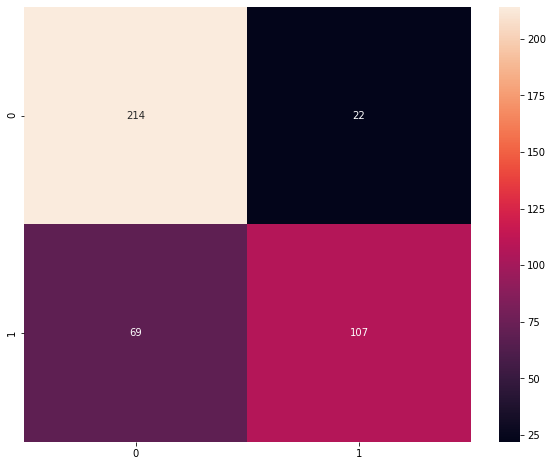

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

In [39]:
print(classification_report(y_test, svc_final.predict(test_x_vect), labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.83      0.61      0.70       176
           0       0.76      0.91      0.82       236

    accuracy                           0.78       412
   macro avg       0.79      0.76      0.76       412
weighted avg       0.79      0.78      0.77       412



Using different evaluation metrics we achieve the following performance values.

In [42]:
## positivo 1, negativo 0
prueba = ['me carga quie la gente borre los mensajes de wsp']
prueba_transformado = vectorizacion.transform(prueba)

svc_final.predict(prueba_transformado)

array([0], dtype=int64)